# Image Compression using K-means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from KMeans import KMeans

%matplotlib inline

### Load an image as NumPy ndarray from the current folder.
To perform image compression with k-means, let's load an image from the current folder and save it as ndarray.  
**Note:** To load a different image set **DIR="path_to_image_directory"** and **FILE="image_file_name"**.

In [2]:
DIR = "images/"
# FILE = "dandelion.jpg"
# FILE = "beach.jpg"
# FILE = "bird.jpg"
# FILE = "flowers.jpg"
# FILE = "sunrise.jpg"
FILE = "rose.jpg"
with Image.open(DIR+FILE) as im:
    im.load()

img = np.asarray(im)

Let's save original shape of the loaded image for the later use.

In [3]:
orig_shape = img.shape

We can view the original image.

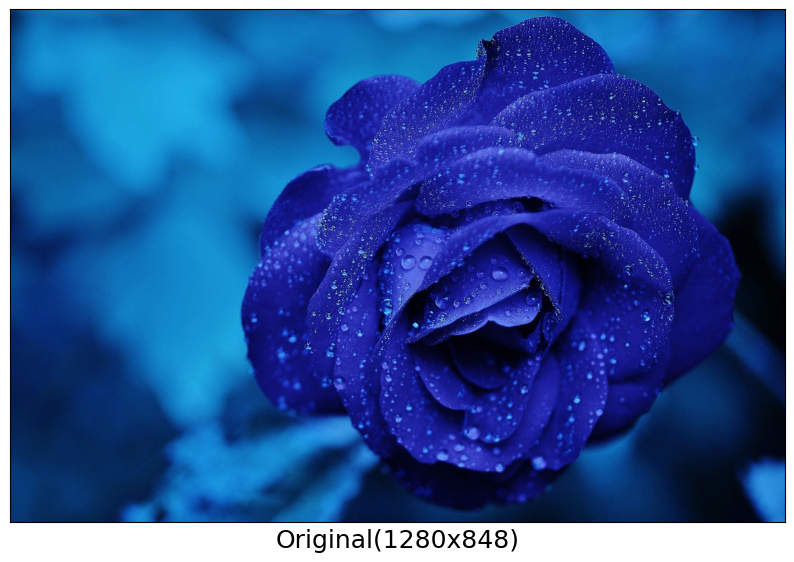

In [4]:
def show_image(img: np.ndarray):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_xlabel("Original({}x{})".format(img.shape[1],img.shape[0]), fontsize=18)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(img)

show_image(img)

### Processing Data (Normalize and Reshape).
* Normalize image data by dividing it by 255. for faster computations. 
* Reshape the image data into an n x 3 matrix where n = number of pixels

In [5]:
# Normailize image data by dividing it by 255. for faster computations. 
img_n = img / 255.

# Reshape the image data into an n x 3 matrix where n = number of pixels
x_flat = np.reshape(img_n, (img_n.shape[0] * img_n.shape[1] , img_n.shape[2]))

Let's view the shape of image data matrix.

In [6]:
x_flat.shape

(1085440, 3)

### Performing K-means on image pixels.
* Initializing models by calling KMeans() with required parameters.
* Perform K-means by calling model.fit()

Let's initialize 3 models corresponding to 3 compressed images with different **cluster** sizes.  

In [7]:
# X: Vector for performing K-means.  
# K: Number of clusters.  
# max_iters: Maximum number of iterations for a single run.  
# iters: Maximum number of times to run K-means. The final result will  
#        have the best(have low distortion) of 'iters' runs. Default = 1.  

# Initializing 3 models with cluster sizes 4, 8, and 16.
# Setting max_iters = 10.
# Setting iters = 5. This will return the best of 5.
model1 = KMeans(X=x_flat, K=4, max_iters=10, iters=5)
model2 = KMeans(X=x_flat, K=8, max_iters=10, iters=5)
model3 = KMeans(X=x_flat, K=16, max_iters=10, iters=5)

Perform K-means on the above models to find the closest centroid of each pixel.  
KMeans.fit() returns: (centroids, centroid_idx, min_distortion)

In [8]:
# Fitting model1.
centroids1, centroid_idx1, _ = model1.fit()

K-means Iteration: 1, Iteration: 1 Current Distortion: 0.11887092624356281
K-means Iteration: 1, Iteration: 2 Current Distortion: 0.11482396096984246
K-means Iteration: 1, Iteration: 3 Current Distortion: 0.11325458390003404
K-means Iteration: 1, Iteration: 4 Current Distortion: 0.1124178941065495
K-means Iteration: 1, Iteration: 5 Current Distortion: 0.11202820932171761
K-means Iteration: 1, Iteration: 6 Current Distortion: 0.11181216989170083
K-means Iteration: 1, Iteration: 7 Current Distortion: 0.11168260716578654
K-means Iteration: 1, Iteration: 8 Current Distortion: 0.11159156323939656
K-means Iteration: 1, Iteration: 9 Current Distortion: 0.11152993724174415
K-means Iteration: 1, Iteration: 10 Current Distortion: 0.11147089250071943
K-means Iteration: 1, Distortion: 0.11147089250071943, Best: (1, 0.11147089250071943)

K-means Iteration: 2, Iteration: 1 Current Distortion: 0.11617735770115188
K-means Iteration: 2, Iteration: 2 Current Distortion: 0.10986102056871615
K-means Itera

In [9]:
# Fitting model2.
centroids2, centroid_idx2, _ = model2.fit()

K-means Iteration: 1, Iteration: 1 Current Distortion: 0.08776951665328621
K-means Iteration: 1, Iteration: 2 Current Distortion: 0.08116945364043654
K-means Iteration: 1, Iteration: 3 Current Distortion: 0.07822939279457351
K-means Iteration: 1, Iteration: 4 Current Distortion: 0.07501783838598475
K-means Iteration: 1, Iteration: 5 Current Distortion: 0.07158823725873716
K-means Iteration: 1, Iteration: 6 Current Distortion: 0.07051081341557976
K-means Iteration: 1, Iteration: 7 Current Distortion: 0.06987593193805902
K-means Iteration: 1, Iteration: 8 Current Distortion: 0.06942155335435472
K-means Iteration: 1, Iteration: 9 Current Distortion: 0.06907076945702492
K-means Iteration: 1, Iteration: 10 Current Distortion: 0.06877707750376846
K-means Iteration: 1, Distortion: 0.06877707750376846, Best: (1, 0.06877707750376846)

K-means Iteration: 2, Iteration: 1 Current Distortion: 0.09634761572838178
K-means Iteration: 2, Iteration: 2 Current Distortion: 0.07913293314189794
K-means Iter

In [10]:
# Fitting model3.
centroids3, centroid_idx3, _ = model3.fit()

K-means Iteration: 1, Iteration: 1 Current Distortion: 0.054219096617504625
K-means Iteration: 1, Iteration: 2 Current Distortion: 0.05016044231934539
K-means Iteration: 1, Iteration: 3 Current Distortion: 0.04718563224645093
K-means Iteration: 1, Iteration: 4 Current Distortion: 0.04613490838234619
K-means Iteration: 1, Iteration: 5 Current Distortion: 0.04552124722624362
K-means Iteration: 1, Iteration: 6 Current Distortion: 0.044884558702107044
K-means Iteration: 1, Iteration: 7 Current Distortion: 0.04412978738364653
K-means Iteration: 1, Iteration: 8 Current Distortion: 0.04338318527307797
K-means Iteration: 1, Iteration: 9 Current Distortion: 0.04288275007256463
K-means Iteration: 1, Iteration: 10 Current Distortion: 0.04263757556015313
K-means Iteration: 1, Distortion: 0.04263757556015313, Best: (1, 0.04263757556015313)

K-means Iteration: 2, Iteration: 1 Current Distortion: 0.05206853881880689
K-means Iteration: 2, Iteration: 2 Current Distortion: 0.0451923739973002
K-means Ite

/Users/jagjotsingh/Study/AI/Projects/image-compression-with-K-means/KMeans.py:90: RuntimeWarning: invalid value encountered in divide
  centroids_ = centroid_sum_ / centroid_total_ele_.reshape(


K-means Iteration: 3, Iteration: 1 Current Distortion: 0.05969974732298261
K-means Iteration: 3, Iteration: 2 Current Distortion: 0.05145029550637068
K-means Iteration: 3, Iteration: 3 Current Distortion: 0.04483182143083619
K-means Iteration: 3, Iteration: 4 Current Distortion: 0.043034413573145
K-means Iteration: 3, Iteration: 5 Current Distortion: 0.04224285826603473
K-means Iteration: 3, Iteration: 6 Current Distortion: 0.04189205186665934
K-means Iteration: 3, Iteration: 7 Current Distortion: 0.041666114789062667
K-means Iteration: 3, Iteration: 8 Current Distortion: 0.04111558417463385
K-means Iteration: 3, Iteration: 9 Current Distortion: 0.04064452597182507
K-means Iteration: 3, Iteration: 10 Current Distortion: 0.04047485712495253
K-means Iteration: 3, Distortion: 0.04047485712495253, Best: (2, 0.04031557947345324)

K-means Iteration: 4, Iteration: 1 Current Distortion: 0.05595704792767326
K-means Iteration: 4, Iteration: 2 Current Distortion: 0.04939116904436239
K-means Itera

### Creating images from the compressed data and Restoring their pixel's color values.   
Replace each pixel with the RGB values(Color) of the closest centroid for above the 3 models.

In [11]:
x_compressed1 = centroids1[centroid_idx1, :]
x_compressed2 = centroids2[centroid_idx2, :]
x_compressed3 = centroids3[centroid_idx3, :]

Multiplying x_compressed data ndarray with 255. to restore color values.

In [12]:
x_compressed1 = x_compressed1 * 255.
x_compressed2 = x_compressed2 * 255.
x_compressed3 = x_compressed3 * 255.

Create images from the compressed data by changing it's shape back to the original shape.

In [13]:
# We also have to change the type of ndarray to np.uint8(data type containing numbers ranging from 0 to 255).
img1 = np.reshape(x_compressed1, orig_shape).astype(np.uint8)
img2 = np.reshape(x_compressed2, orig_shape).astype(np.uint8)
img3 = np.reshape(x_compressed3, orig_shape).astype(np.uint8)

### Visulaizing all the images.  
Let's display all the images side by side.

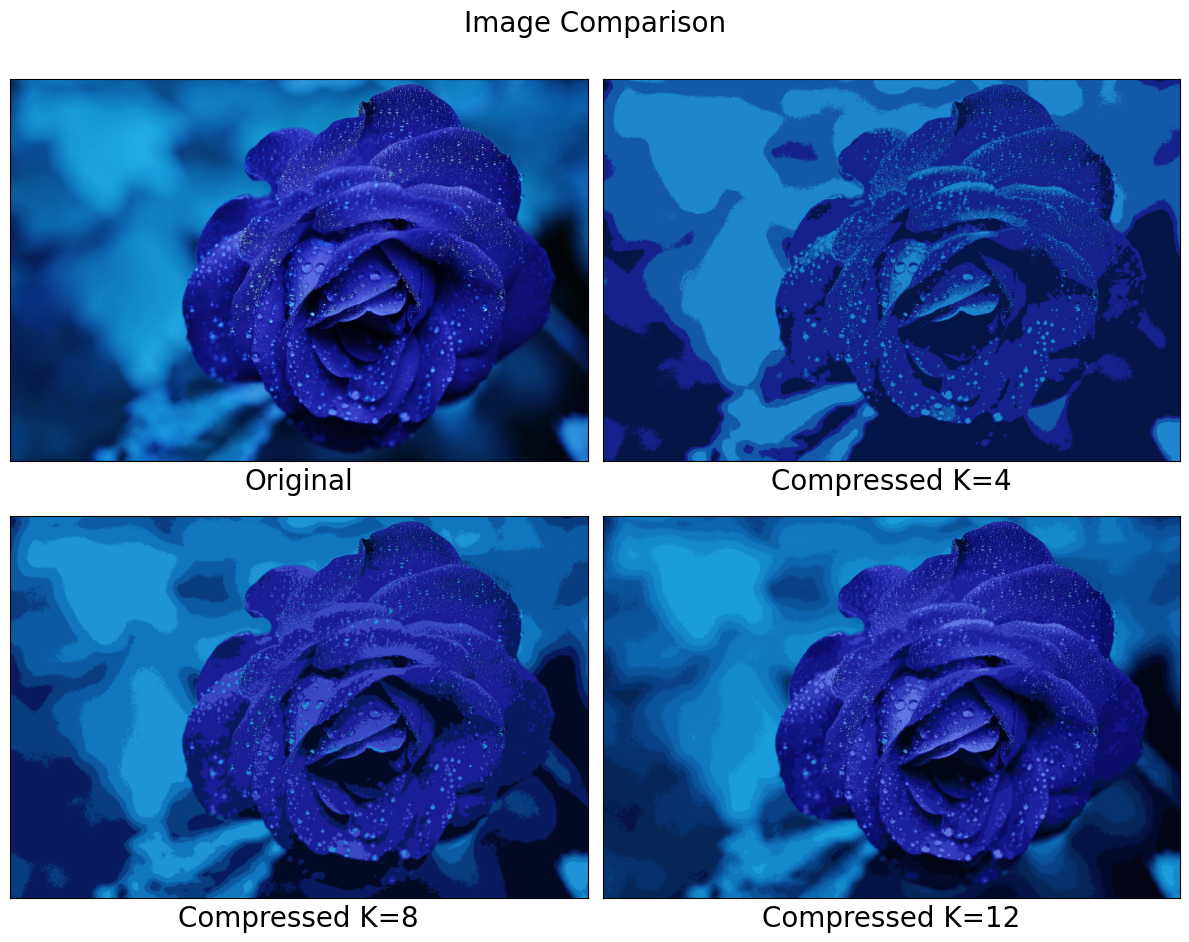

In [14]:
# Below code displays 4 images(1 original and 3 compressed) above side by side.

def visualize_images(img1, img2, img3, img4):
    # Create a figure with 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 9.6))
    
    # Plot each image in a subplot
    axes[0, 0].imshow(img1)
    axes[0, 0].set_xlabel("Original", fontsize=20)
    # axes[0, 0].set_title("Original")
    
    axes[0, 1].imshow(img2)
    axes[0, 1].set_xlabel("Compressed K=4", fontsize=20)
    # axes[0, 1].set_title("Compressed K=4")
    
    axes[1, 0].imshow(img3)
    axes[1, 0].set_xlabel("Compressed K=8", fontsize=20)
    # axes[1, 0].set_title("Compressed K=8")
    
    axes[1, 1].imshow(img4)
    axes[1, 1].set_xlabel("Compressed K=12", fontsize=20)
    # axes[1, 1].set_title("Compressed K=16")
    
    # Hide axis labels and ticks
    for ax in axes.flat:
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Display the images
    fig.suptitle('Image Comparison', fontsize=20)
    plt.tight_layout()
    plt.show()

visualize_images(img, img1, img2, img3)

### **Optional**: Save compressed images and compare their size.  
Run the below cell to save the images as .png files in current working directory.

In [15]:
Image.fromarray(img).save("original_img.png")
Image.fromarray(img1).save("compressed_img1.png")
Image.fromarray(img2).save("compressed_img2.png")
Image.fromarray(img3).save("compressed_img3.png")

orig_img_size = os.path.getsize("original_img.png")
compressed_img1_size = os.path.getsize("compressed_img1.png")
compressed_img2_size = os.path.getsize("compressed_img2.png")
compressed_img3_size = os.path.getsize("compressed_img3.png")

print("Original Image PNG Size: {} bytes".format(orig_img_size))
print("Compressed Image1 Size : {} bytes".format(compressed_img1_size))
print("Compressed Image2 Size : {} bytes".format(compressed_img2_size))
print("Compressed Image3 Size : {} bytes".format(compressed_img3_size))

Original Image PNG Size: 1518406 bytes
Compressed Image1 Size : 131077 bytes
Compressed Image2 Size : 170299 bytes
Compressed Image3 Size : 269769 bytes


### Why size of the compressed images is bigger than the .jpg file?
Well to keep things simple, comparing .png and .jpg is not an apples-to-apples comparison. PNG is a lossless format.  
In my code to compare image sizes, I've converted the original JPG image to PNG (lossy to lossless) and then compared  
it's size to compressed PNG images which is more of an apples-to-apples comparison. 🙂